In [1]:
import math
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib
import seaborn as sns #visualization
from warnings import simplefilter

import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the .xlsx dataset in to the dataframe
df = pd.read_excel("/kaggle/input/malefertilitydataset/DIB dataset and codebook.xlsx")

In [3]:
df.head()

,ID,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,...,JS33,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6
0,1,2,1,1,1,1,1,6,1,4,...,5,4,4,4,4,4,4,2,5,5
1,2,2,1,1,1,2,1,6,1,3,...,5,3,5,5,5,5,4,5,5,5
2,3,2,1,1,1,2,1,6,1,5,...,5,5,5,5,5,5,5,5,5,5
3,4,3,1,1,2,1,2,5,1,5,...,4,5,5,5,2,2,2,4,5,5
4,5,2,1,1,1,1,1,6,1,3,...,5,5,5,5,5,5,5,5,5,5


In [4]:
df.shape

(309, 95)

In [5]:
df.columns

Index(['ID', 'Age', 'Religion', 'Ethnicity', 'Marital status',
       'Marriage period', 'No. of children', 'Educational level',
       'Employment status', 'Working period', 'Household income',
       'Sperm quality', 'OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8',
       'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14', 'OS15', 'OS16', 'OS17',
       'OS18', 'OS19', 'OS20', 'OS21', 'OS22', 'OS23', 'OS24', 'OS25', 'OS26',
       'OS27', 'OS28', 'OS29', 'OS30', 'OS31', 'OS32', 'OS33', 'OS34', 'OS35',
       'OS36', 'OS37', 'OS38', 'OS39', 'OS40', 'OS41', 'JS1', 'JS2', 'JS3',
       'JS4', 'JS5', 'JS6', 'JS7', 'JS8', 'JS9', 'JS10', 'JS11', 'JS12',
       'JS13', 'JS14', 'JS15', 'JS16', 'JS17', 'JS18', 'JS19', 'JS20', 'JS21',
       'JS22', 'JS23', 'JS24', 'JS25', 'JS26', 'JS27', 'JS28', 'JS29', 'JS30',
       'JS31', 'JS32', 'JS33', 'JS34', 'JS35', 'JS36', 'JP1', 'JP2', 'JP3',
       'JP4', 'JP5', 'JP6'],
      dtype='object')

In [6]:
df.nunique()

ID                309
Age                 5
Religion            4
Ethnicity           5
Marital status      2
                 ... 
JP2                 5
JP3                 4
JP4                 4
JP5                 5
JP6                 5
Length: 95, dtype: int64

In [7]:
df['Age'].value_counts()

Age
2    208
3     68
1     28
4      4
5      1
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

In [8]:
#droping the column ID since it's not important
df = df.drop(['ID'],axis=1)
df.head()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS33,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6
0,2,1,1,1,1,1,6,1,4,7,...,5,4,4,4,4,4,4,2,5,5
1,2,1,1,1,2,1,6,1,3,4,...,5,3,5,5,5,5,4,5,5,5
2,2,1,1,1,2,1,6,1,5,7,...,5,5,5,5,5,5,5,5,5,5
3,3,1,1,2,1,2,5,1,5,10,...,4,5,5,5,2,2,2,4,5,5
4,2,1,1,1,1,1,6,1,3,5,...,5,5,5,5,5,5,5,5,5,5


In [9]:
df.isnull().any()

Age                False
Religion           False
Ethnicity          False
Marital status     False
Marriage period    False
                   ...  
JP2                False
JP3                False
JP4                False
JP5                False
JP6                False
Length: 94, dtype: bool

In [10]:
df.isnull().sum()

Age                0
Religion           0
Ethnicity          0
Marital status     0
Marriage period    0
                  ..
JP2                0
JP3                0
JP4                0
JP5                0
JP6                0
Length: 94, dtype: int64

In [11]:
df = df.dropna(how='any',axis=0)
df.isnull().sum()

Age                0
Religion           0
Ethnicity          0
Marital status     0
Marriage period    0
                  ..
JP2                0
JP3                0
JP4                0
JP5                0
JP6                0
Length: 94, dtype: int64

In [12]:
df.shape
df.head(20)

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS33,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6
0,2,1,1,1,1,1,6,1,4,7,...,5,4,4,4,4,4,4,2,5,5
1,2,1,1,1,2,1,6,1,3,4,...,5,3,5,5,5,5,4,5,5,5
2,2,1,1,1,2,1,6,1,5,7,...,5,5,5,5,5,5,5,5,5,5
3,3,1,1,2,1,2,5,1,5,10,...,4,5,5,5,2,2,2,4,5,5
4,2,1,1,1,1,1,6,1,3,5,...,5,5,5,5,5,5,5,5,5,5
5,2,1,1,1,2,1,7,1,4,5,...,5,5,5,5,5,5,5,5,5,5
6,2,1,1,1,1,1,6,1,5,4,...,4,2,2,4,4,4,4,4,4,4
7,2,1,1,1,2,1,7,1,4,1,...,5,5,5,3,5,5,5,5,5,1
8,3,1,1,2,3,1,6,1,5,1,...,4,4,5,4,5,5,4,5,4,5
9,3,1,1,1,2,1,5,1,5,5,...,4,3,3,2,3,3,2,2,2,2


In [13]:
df.nunique()

Age                5
Religion           4
Ethnicity          5
Marital status     2
Marriage period    3
                  ..
JP2                5
JP3                4
JP4                4
JP5                5
JP6                5
Length: 94, dtype: int64

In [14]:
df.describe()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS33,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,2.165049,1.084142,1.129450,1.100324,1.883495,1.323625,6.019417,1.042071,4.433657,5.132686,...,3.980583,3.922330,3.789644,3.705502,4.207120,4.194175,4.090615,4.042071,4.239482,4.388350
std,0.604589,0.433246,0.560676,0.300918,0.772510,0.557236,1.164802,0.257694,0.882532,2.599675,...,0.833323,0.911927,0.979211,1.032273,0.722425,0.650548,0.754774,0.861238,0.765062,0.682333
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,4.000000,3.000000,...,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,6.000000,1.000000,5.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,7.000000,1.000000,5.000000,7.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,4.000000,5.000000,2.000000,3.000000,3.000000,9.000000,3.000000,5.000000,10.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Distributions

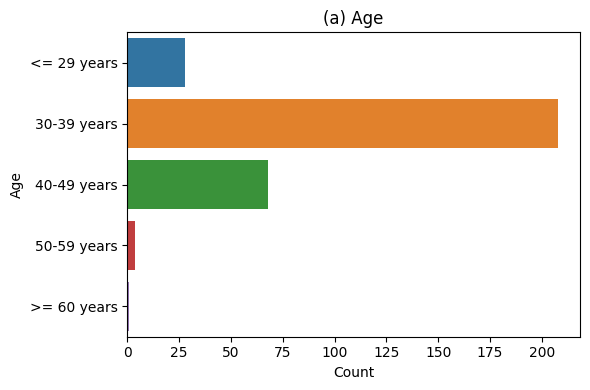

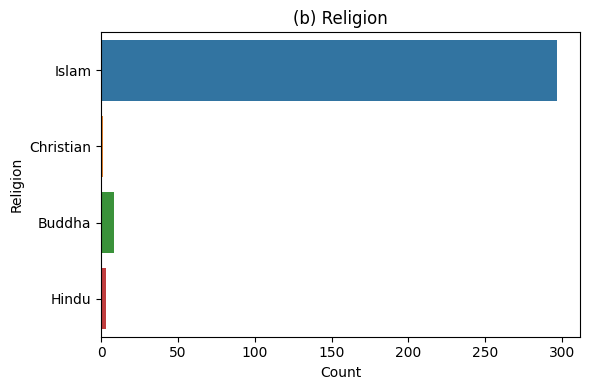

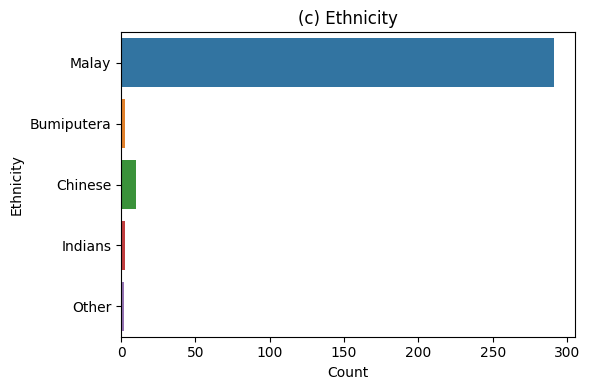

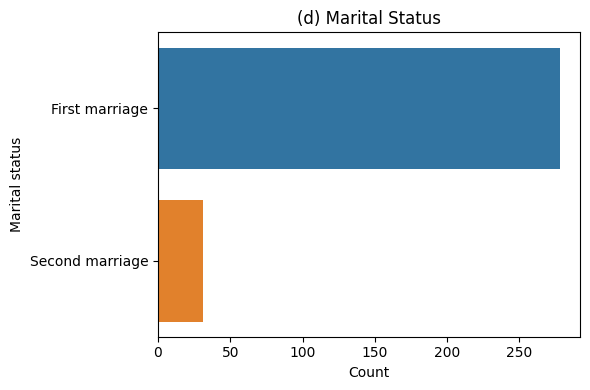

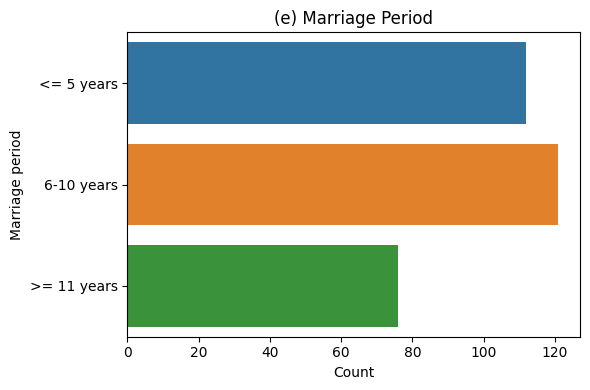

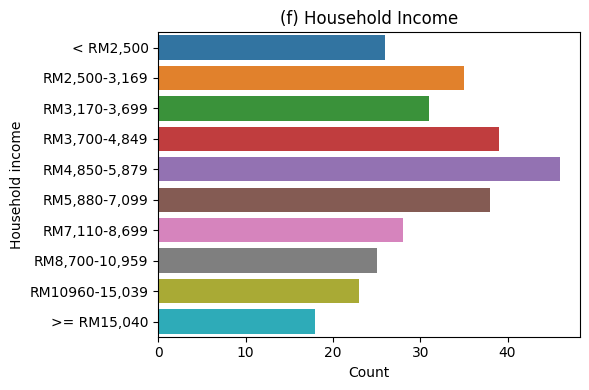

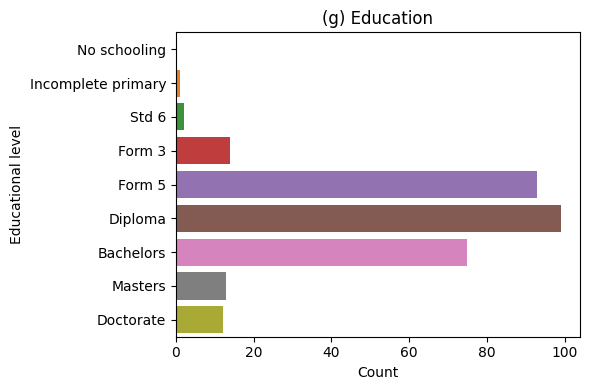

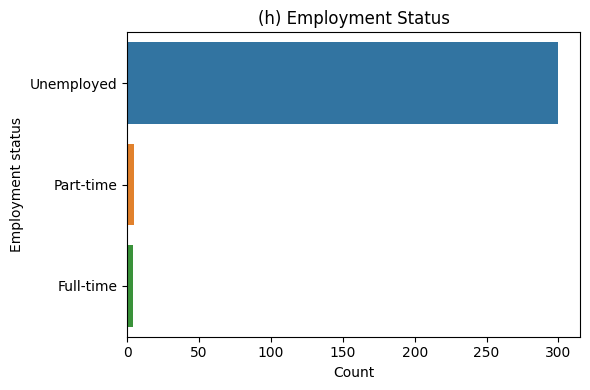

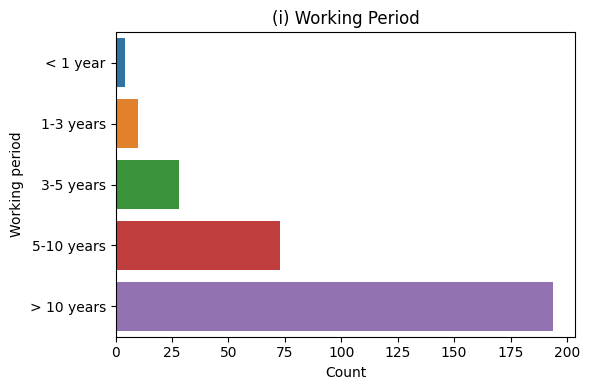

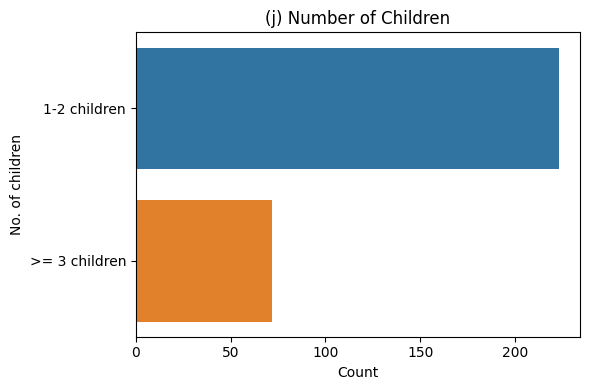

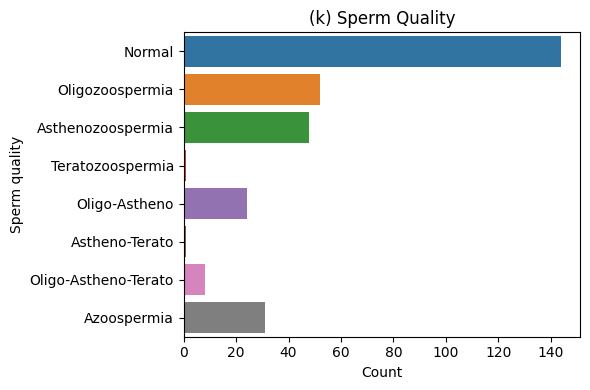

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping dictionaries (numeric -> category labels)
age_map = {
    1: "<= 29 years", 2: "30-39 years", 3: "40-49 years",
    4: "50-59 years", 5: ">= 60 years"
}
religion_map = {
    1: "Islam", 2: "Christian", 3: "Buddha", 4: "Hindu"
}
ethnicity_map = {
    1: "Malay", 2: "Bumiputera", 3: "Chinese", 4: "Indians", 5: "Other"
}
marital_status_map = {
    1: "First marriage", 2: "Second marriage"
}
marriage_period_map = {
    1: "<= 5 years", 2: "6-10 years", 3: ">= 11 years"
}
household_income_map = {
    1: "< RM2,500", 2: "RM2,500-3,169", 3: "RM3,170-3,699", 4: "RM3,700-4,849",
    5: "RM4,850-5,879", 6: "RM5,880-7,099", 7: "RM7,110-8,699",
    8: "RM8,700-10,959", 9: "RM10960-15,039", 10: ">= RM15,040"
}
education_map = {
    1: "No schooling", 2: "Incomplete primary", 3: "Std 6", 4: "Form 3",
    5: "Form 5", 6: "Diploma", 7: "Bachelors", 8: "Masters", 9: "Doctorate"
}
employment_map = {
    1: "Unemployed", 2: "Part-time", 3: "Full-time"
}
working_period_map = {
    1: "< 1 year", 2: "1-3 years", 3: "3-5 years", 4: "5-10 years", 5: "> 10 years"
}
children_map = {
    1: "1-2 children", 2: ">= 3 children"
}
sperm_quality_map = {
    1: "Normal", 2: "Oligozoospermia", 3: "Asthenozoospermia", 4: "Teratozoospermia",
    5: "Oligo-Astheno", 6: "Astheno-Terato", 7: "Oligo-Astheno-Terato", 8: "Azoospermia"
}

# Apply mappings to your dataframe
df["Age"] = df["Age"].map(age_map)
df["Religion"] = df["Religion"].map(religion_map)
df["Ethnicity"] = df["Ethnicity"].map(ethnicity_map)
df["Marital status"] = df["Marital status"].map(marital_status_map)
df["Marriage period"] = df["Marriage period"].map(marriage_period_map)
df["Household income"] = df["Household income"].map(household_income_map)
df["Educational level"] = df["Educational level"].map(education_map)
df["Employment status"] = df["Employment status"].map(employment_map)
df["Working period"] = df["Working period"].map(working_period_map)
df["No. of children"] = df["No. of children"].map(children_map)
df["Sperm quality"] = df["Sperm quality"].map(sperm_quality_map)

# Function to plot and save each distribution
def plot_distribution(col, order=None, title=None, fname=None):
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=order)
    plt.title(title if title else col)
    plt.xlabel("Count")
    plt.tight_layout()
    plt.savefig(fname if fname else f"{col}_distribution.png", dpi=300)
    plt.show()

# Plot individually (you can control order explicitly)
plot_distribution("Age", order=list(age_map.values()), title="(a) Age", fname="age.png")
plot_distribution("Religion", order=list(religion_map.values()), title="(b) Religion", fname="religion.png")
plot_distribution("Ethnicity", order=list(ethnicity_map.values()), title="(c) Ethnicity", fname="ethnicity.png")
plot_distribution("Marital status", order=list(marital_status_map.values()), title="(d) Marital Status", fname="marital_status.png")
plot_distribution("Marriage period", order=list(marriage_period_map.values()), title="(e) Marriage Period", fname="marriage_period.png")
plot_distribution("Household income", order=list(household_income_map.values()), title="(f) Household Income", fname="income.png")
plot_distribution("Educational level", order=list(education_map.values()), title="(g) Education", fname="education.png")
plot_distribution("Employment status", order=list(employment_map.values()), title="(h) Employment Status", fname="employment.png")
plot_distribution("Working period", order=list(working_period_map.values()), title="(i) Working Period", fname="working_period.png")
plot_distribution("No. of children", order=list(children_map.values()), title="(j) Number of Children", fname="children.png")
plot_distribution("Sperm quality", order=list(sperm_quality_map.values()), title="(k) Sperm Quality", fname="sperm_quality.png")


**Job satisfection response**

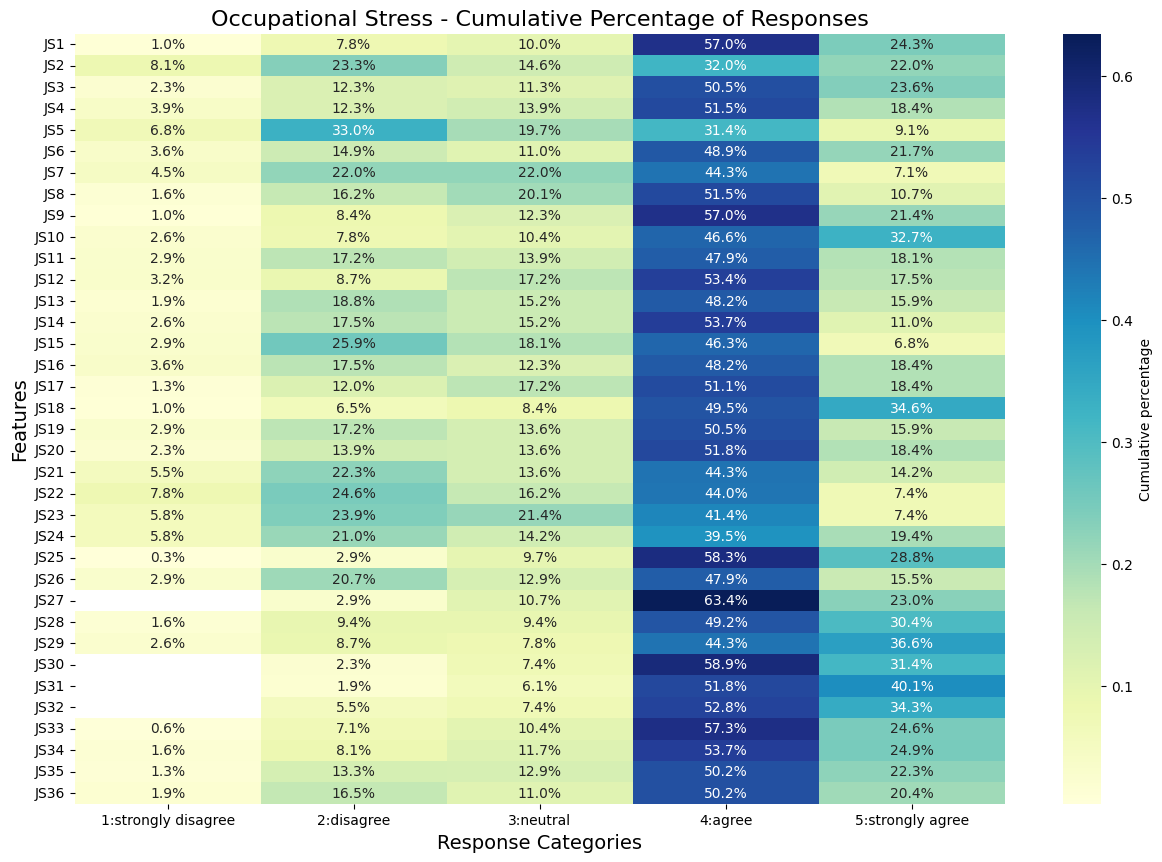

In [17]:
features = ['JS1', 'JS2', 'JS3', 'JS4', 'JS5', 'JS6', 'JS7', 'JS8', 'JS9', 'JS10', 'JS11',
            'JS12', 'JS13', 'JS14', 'JS15', 'JS16', 'JS17', 'JS18', 'JS19', 'JS20', 'JS21',
            'JS22', 'JS23', 'JS24', 'JS25', 'JS26', 'JS27', 'JS28', 'JS29', 'JS30', 'JS31',
            'JS32', 'JS33', 'JS34', 'JS35', 'JS36']

response_categories = [1, 2, 3, 4, 5]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Set a larger figure size
plt.figure(figsize=(15, 10))

# Plot the heatmap with custom labels
sns.heatmap(counts_df, cmap='YlGnBu', annot=True, fmt=".1%", cbar_kws={'label': 'Cumulative percentage'},
            xticklabels=['1:strongly disagree', '2:disagree', '3:neutral', '4:agree', '5:strongly agree'])

plt.xlabel('Response Categories', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Occupational Stress - Cumulative Percentage of Responses', fontsize=16)
plt.savefig("js_percentage.png", dpi=300)
plt.show()
